## TD N¬∞2 explicabilit√© du dataset Boston Housing

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de donn√©es pour cr√©er une r√©gression lin√©aire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Cr√©er un mod√®le baseline lin√©aire et random forest

4) Interpr√©ter le mod√®le lin√©aire

5) Tuner votre random forest

6) Interpr√©ter globalement votre mod√®le meilleur mod√®le RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les r√©sulats du random forest avec votre interpr√©tation du mod√®le lin√©aire

6) R√©aliser une explicabilit√© par individu
   1) En utilisant la m√©thode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une pr√©diction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la pr√©diction)

7) R√©aliser une explicabilit√© par individu sur le mod√®le RF
- 1) ICE, le PDP est-il une bonne repr√©sentation des variables importantes de votre mod√®le?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP √©tudi√©s  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (√©quivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de donn√©es couramment utilis√© en apprentissage automatique et en statistique pour √©tudier les relations entre diverses caract√©ristiques socio-√©conomiques et immobili√®res dans la ville de Boston.  
Il contient des informations sur des propri√©t√©s r√©sidentielles et leur environnement, et est souvent utilis√© pour pr√©dire la valeur des maisons, un probl√®me classique de r√©gression.

**Variable dispo**: 
- CRIM : taux de criminalit√© par habitant par ville
- ZN : proportion de terrains r√©sidentiels zon√©s pour des lots de plus de 25 000 pieds carr√©s
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximit√© de la rivi√®re Charles (= 1 si la zone d√©limit√©e par la ville touche la rivi√®re ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pi√®ces par logement
- AGE : proportion des unit√©s occup√©es par leur propri√©taire et construites avant 1940
- DIS : distances pond√©r√©es vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilit√© aux autoroutes radiales
- TAX : taux d'imposition fonci√®re par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio √©l√®ves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-√©conomique inf√©rieur
- MEDV : valeur m√©diane des maisons occup√©es par leur propri√©taire (en milliers de dollars) - **variable cible**

In [1]:
#Web request
import requests
import io
import pandas as pd

### 1) Charger le dataset bostong_housing

In [2]:
#T√©l√©charge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [3]:
df

Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

       TAX  PTRATIO  LSTAT  MEDV  
0    296.0     15.3   4.98  24.0  
1    242.0     17.8   9.14  21.6  
2    242.0     17.8   4.03  34.7  
3    222.0     18.7   2.94  33.4  
4    222.0     18.7   5.33  36.2  
..     ...      ...    ...   ...  
501  273.0     21.0   9.67  22.4  
502  273.0     21.0   9.08  20.6  
503  273.0     21.0   5.64  23.9  
504  273.0     21.0   6.48  22.0  
505  273.0     21.0   7.88  11.9  

[506 rows x 14 columns]

### 2)Nettoyer votre jeu de donn√©es pour cr√©er une r√©gression lin√©aire et un random forest

Penser √† :

- V√©rifier comment encoder vos variables qualitatives pour la mod√©lisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corr√©lations

>Tester d'ajouter des features log, quadratique, ...

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


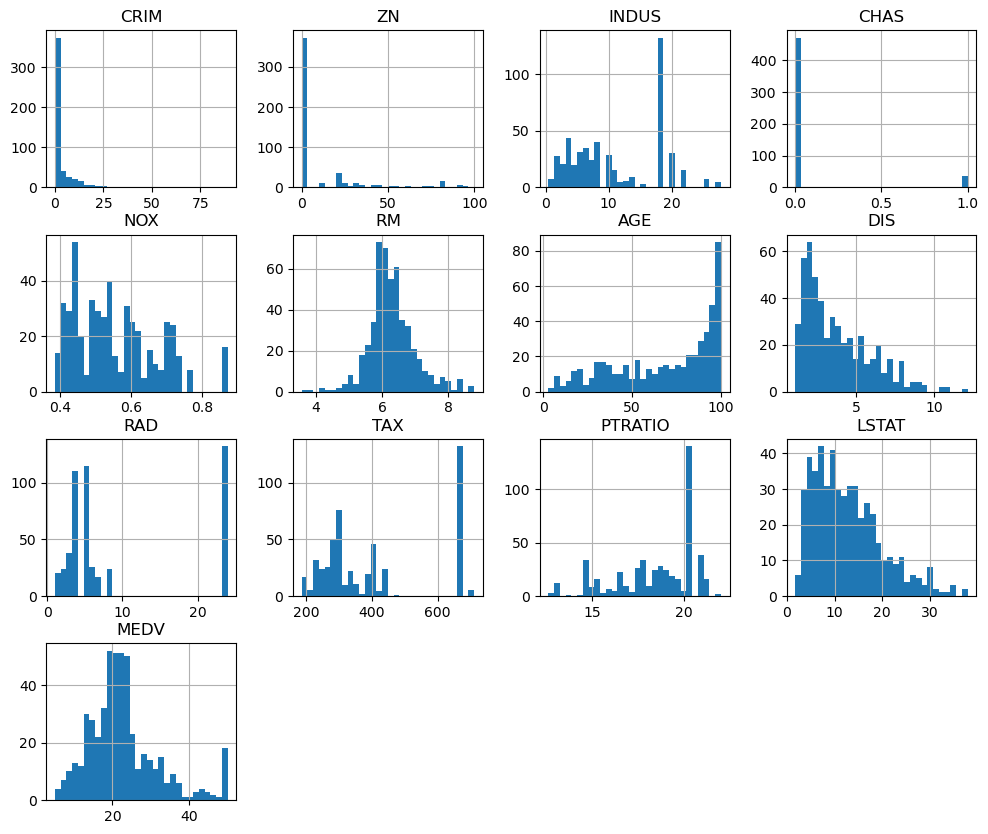

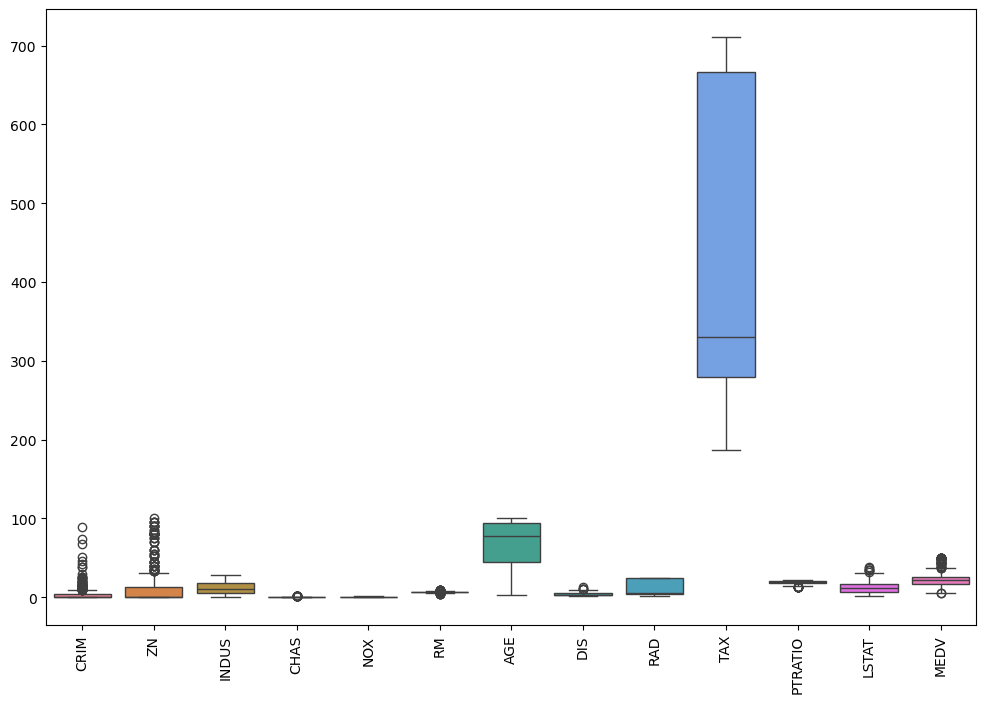

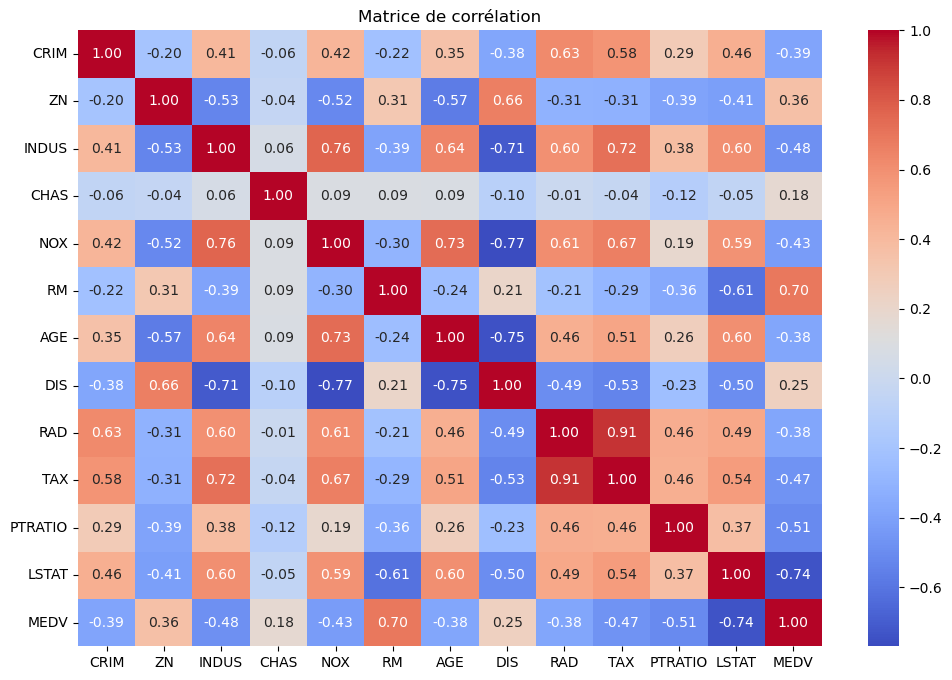


R√©gression Lin√©aire Performance:
R¬≤ Score: 0.8093
RMSE: 3.7394
MAE: 2.3327

Random Forest Performance:
R¬≤ Score: 0.8846
RMSE: 2.9086
MAE: 2.0323


In [4]:
# Importation des biblioth√®ques n√©cessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import requests
import io

# Charger le dataset
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

# Suppression de la colonne inutile "Unnamed: 0"
df.drop(columns=['Unnamed: 0'], inplace=True)

# Affichage des premi√®res lignes du dataset
print(df.head())

# V√©rification des valeurs manquantes
print(df.isnull().sum())

# Analyse des distributions des variables
df.hist(figsize=(12, 10), bins=30)
plt.show()

# D√©tection des outliers avec Boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Analyse des corr√©lations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corr√©lation")
plt.show()

# Transformation logarithmique de certaines variables pour r√©duire l'effet des outliers
df['CRIM_log'] = np.log1p(df['CRIM'])  
df['DIS_log'] = np.log1p(df['DIS'])
df['LSTAT_log'] = np.log1p(df['LSTAT'])

# Ajout de termes quadratiques pour capturer des relations non lin√©aires
df['RM_squared'] = df['RM'] ** 2
df['LSTAT_squared'] = df['LSTAT'] ** 2

# D√©finition des variables ind√©pendantes et de la variable cible
X = df.drop(columns=['MEDV', 'CRIM', 'DIS', 'LSTAT'])  # On enl√®ve les versions non transform√©es
y = df['MEDV']

# Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation pour la r√©gression lin√©aire
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mod√©lisation : R√©gression Lin√©aire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Mod√©lisation : Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # Pas besoin de normaliser pour Random Forest
y_pred_rf = rf_reg.predict(X_test)

# √âvaluation des mod√®les
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

# R√©sultats
evaluate_model(y_test, y_pred_lin, "R√©gression Lin√©aire")
evaluate_model(y_test, y_pred_rf, "Random Forest")


In [ ]:
Si on veut expliquer l'impact des variables, la r√©gression lin√©aire est pr√©f√©rable.
Si on veut pr√©dire avec pr√©cision, alors Random Forest est le meilleur choix.

### 3)Cr√©er 2 mod√®les baseline, lin√©aire et random forest

In [5]:
# Entra√Ænement de la R√©gression Lin√©aire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Pr√©dictions
y_pred_lin = lin_reg.predict(X_test_scaled)

# √âvaluation du mod√®le
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f"R√©gression Lin√©aire Performance:\nR¬≤ Score: {r2_lin:.4f}\nRMSE: {rmse_lin:.4f}\nMAE: {mae_lin:.4f}")


R√©gression Lin√©aire Performance:
R¬≤ Score: 0.8093
RMSE: 3.7394
MAE: 2.3327


In [6]:
# Entra√Ænement du Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)  # Pas besoin de normalisation pour RF

# Pr√©dictions
y_pred_rf = rf_reg.predict(X_test)

# √âvaluation du mod√®le
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"\nRandom Forest Performance:\nR¬≤ Score: {r2_rf:.4f}\nRMSE: {rmse_rf:.4f}\nMAE: {mae_rf:.4f}")



Random Forest Performance:
R¬≤ Score: 0.8846
RMSE: 2.9086
MAE: 2.0323


### 4) Interpr√©ter le mod√®le lin√©aire
Utiliser les m√©thodes intrins√®ques du mod√®le pour l'interpr√©tation

In [7]:
# R√©cup√©ration des coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
})

# Tri des variables par importance absolue
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

# Affichage des coefficients
print("Coefficients de la R√©gression Lin√©aire :")
print(coefficients)


üìå Coefficients de la R√©gression Lin√©aire :
          Feature  Coefficient
12     RM_squared    16.735162
4              RM   -14.487983
11      LSTAT_log    -5.468389
6             RAD     3.434073
9        CRIM_log    -3.082674
10        DIS_log    -2.867622
3             NOX    -1.827562
7             TAX    -1.740341
8         PTRATIO    -1.688107
2            CHAS     0.565945
13  LSTAT_squared     0.476753
1           INDUS     0.253835
5             AGE     0.247925
0              ZN     0.108021


C:\Users\lucas\AppData\Local\Temp\ipykernel_12696\2335608046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=coefficients['Feature'], x=coefficients['Coefficient'], palette="coolwarm")


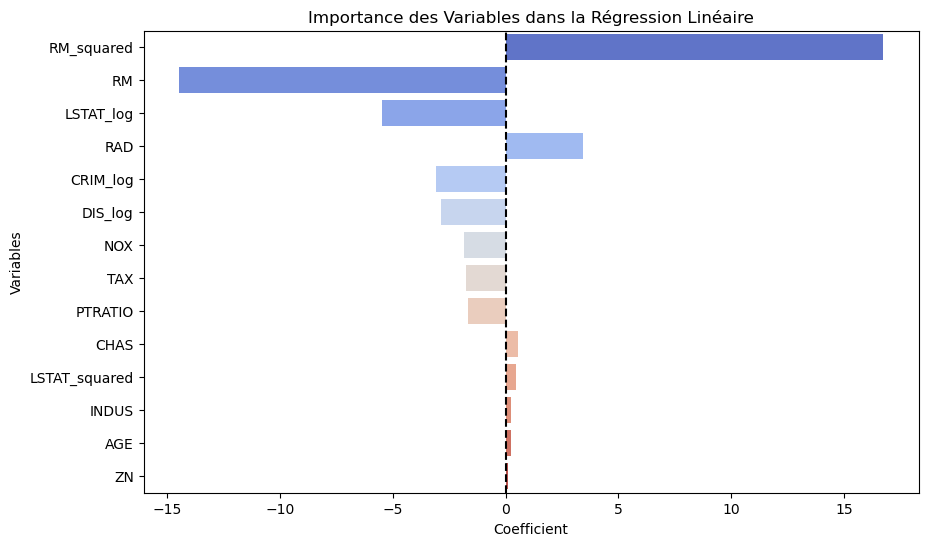

In [8]:
# Affichage graphique des coefficients
plt.figure(figsize=(10, 6))
sns.barplot(y=coefficients['Feature'], x=coefficients['Coefficient'], palette="coolwarm")
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Importance des Variables dans la R√©gression Lin√©aire")
plt.xlabel("Coefficient")
plt.ylabel("Variables")
plt.show()


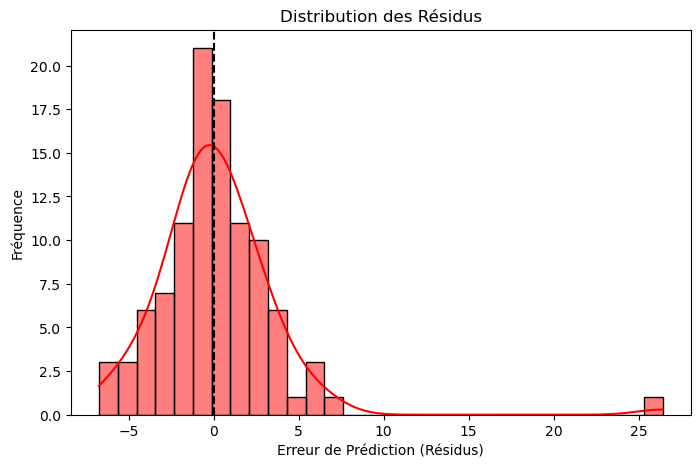

In [9]:
# Calcul des r√©sidus
residuals = y_test - y_pred_lin

# Distribution des r√©sidus
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Distribution des R√©sidus")
plt.xlabel("Erreur de Pr√©diction (R√©sidus)")
plt.ylabel("Fr√©quence")
plt.show()


In [ ]:
Le mod√®le lin√©aire montre l'importance de certaines variables comme le nombre de pi√®ces (RM), le statut socio-√©conomique (LSTAT), et la criminalit√© (CRIM), mais des relations non lin√©aires et d'interactions entre variables pourraient √™tre mieux captur√©es par des mod√®les plus complexes, comme le Random Forest.

### 5) Tuner votre random forest

In [10]:
from sklearn.model_selection import GridSearchCV

# D√©finir la grille de param√®tres √† tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'√©chantillons pour diviser un n≈ìud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'√©chantillons dans une feuille
    'bootstrap': [True, False]        # Utilisation ou non du bootstrap
}

# Cr√©er un mod√®le Random Forest
rf = RandomForestRegressor(random_state=42)

# Cr√©ation de l'objet GridSearchCV avec validation crois√©e
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entra√Ænement du mod√®le avec la recherche sur grille
grid_search.fit(X_train, y_train)

# R√©sultats de la recherche sur grille
print(f"\nMeilleurs param√®tres : {grid_search.best_params_}")
print(f"Meilleur score (N√©gatif de l'erreur quadratique moyenne) : {grid_search.best_score_}")

# Pr√©dictions avec le mod√®le optimal
y_pred_rf_optimal = grid_search.best_estimator_.predict(X_test)

# √âvaluation du mod√®le avec les meilleurs param√®tres
r2_rf_optimal = r2_score(y_test, y_pred_rf_optimal)
rmse_rf_optimal = np.sqrt(mean_squared_error(y_test, y_pred_rf_optimal))
mae_rf_optimal = mean_absolute_error(y_test, y_pred_rf_optimal)

print(f"\nPerformance du Random Forest Optimis√© :")
print(f"R¬≤ Score: {r2_rf_optimal:.4f}")
print(f"RMSE: {rmse_rf_optimal:.4f}")
print(f"MAE: {mae_rf_optimal:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Meilleurs param√®tres : {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score (N√©gatif de l'erreur quadratique moyenne) : -14.784984716290705

Performance du Random Forest Optimis√© :
R¬≤ Score: 0.8772
RMSE: 3.0004
MAE: 2.0555


In [ ]:
Apr√®s optimisation du mod√®le Random Forest, voici les r√©sultats cl√©s :

Meilleurs param√®tres :
bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100.
Performance optimis√©e :
R¬≤ Score : 0.8772 (meilleure capacit√© √† expliquer la variance des donn√©es)
RMSE : 3.0004 (r√©duction de l'erreur quadratique par rapport au mod√®le initial)
MAE : 2.0555 (r√©duction de l'erreur absolue moyenne)
En r√©sum√©, l'optimisation a permis d'am√©liorer la pr√©cision des pr√©dictions du mod√®le, avec une meilleure capacit√© √† expliquer les donn√©es et des erreurs plus faibles.

### 6) Interpr√©ter globalement votre mod√®le meilleur mod√®le RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les r√©sulats du random forest avec votre interpr√©tation du mod√®le lin√©aire

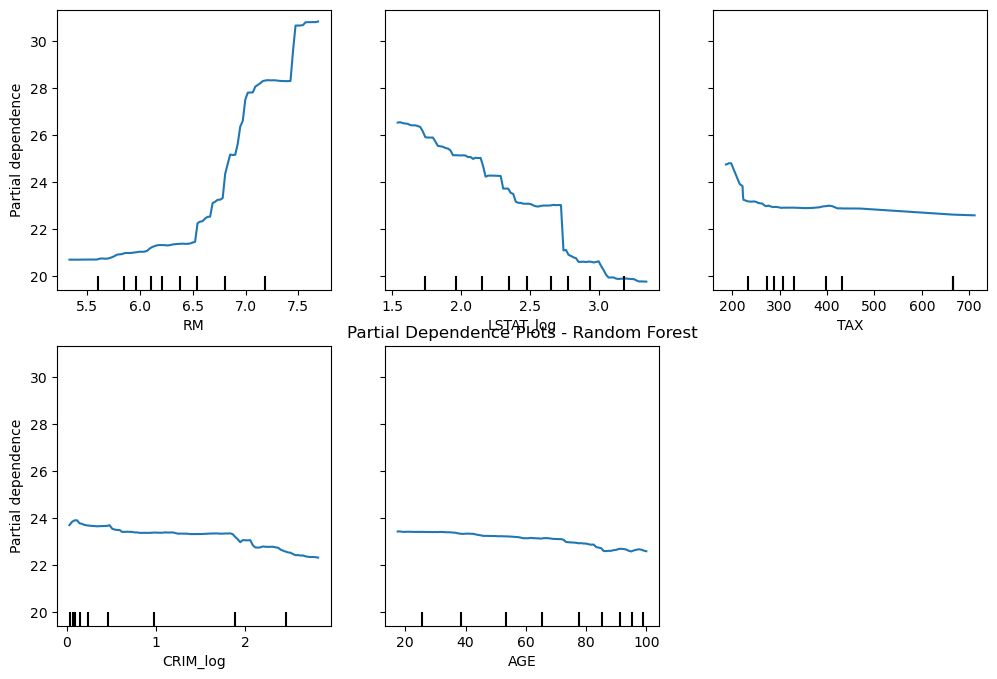

In [11]:
from sklearn.inspection import PartialDependenceDisplay


# Liste des variables √† utiliser dans les PDP (transform√©es si n√©cessaire)
features_to_plot = ['RM', 'LSTAT_log', 'TAX', 'CRIM_log', 'AGE']

# Affichage des PDP pour les variables les plus importantes
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rf_reg, X_train, features=features_to_plot, feature_names=X.columns, ax=ax)
plt.title("Partial Dependence Plots - Random Forest")
plt.show()



C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor wa

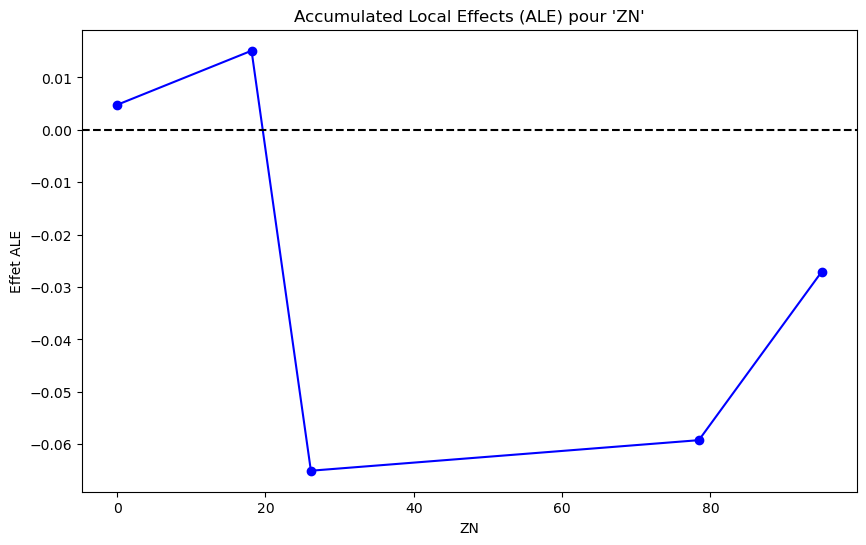

In [21]:
from alibi.explainers import ALE
import matplotlib.pyplot as plt

# D√©finition de l'explainer ALE (passer rf_reg.predict comme fonction)
ale_explainer = ALE(rf_reg.predict, feature_names=X.columns)

# Calcul des effets ALE sur l'ensemble de test
ale_exp = ale_explainer.explain(X_test.values)

# Affichage des effets ALE pour 'ZN' (index 0)
zn_idx = list(X.columns).index('ZN')  # Trouver l'index de 'ZN'
ale_values = ale_exp.ale_values[zn_idx]
feature_values = ale_exp.feature_values[zn_idx]

# Visualisation de l'effet ALE pour 'ZN'
plt.figure(figsize=(10, 6))
plt.plot(feature_values, ale_values, marker='o', linestyle='-', color='b')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("ZN")
plt.ylabel("Effet ALE")
plt.title("Accumulated Local Effects (ALE) pour 'ZN'")
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_12696\1642387436.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_df, palette="coolwarm")


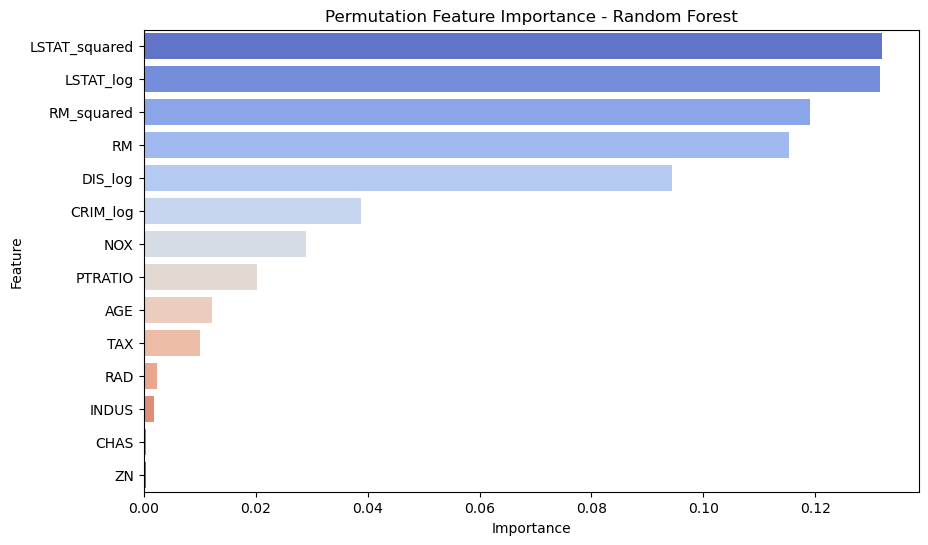

In [13]:
from sklearn.inspection import permutation_importance

# Calcul de l'importance des variables via permutation
perm_importance = permutation_importance(rf_reg, X_test, y_test, n_repeats=10, random_state=42)

# Affichage de l'importance des caract√©ristiques
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Affichage des r√©sultats
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette="coolwarm")
plt.title("Permutation Feature Importance - Random Forest")
plt.show()


In [ ]:
Les graphiques et techniques comme les PDP, ALE et l'importance des variables par permutation nous aident √† mieux comprendre comment les diff√©rentes caract√©ristiques influencent la pr√©diction du mod√®le RF. Par rapport au mod√®le lin√©aire, le RF peut capturer des relations plus complexes, notamment les effets non lin√©aires et les interactions entre variables.

### 7) R√©aliser une explicabilit√© par individu sur le mod√®le RF
- 1) ICE, le PDP est-il une bonne repr√©sentation des variables importantes de votre mod√®le?
- 2) LIME
- 3) SHAP watterfall plot

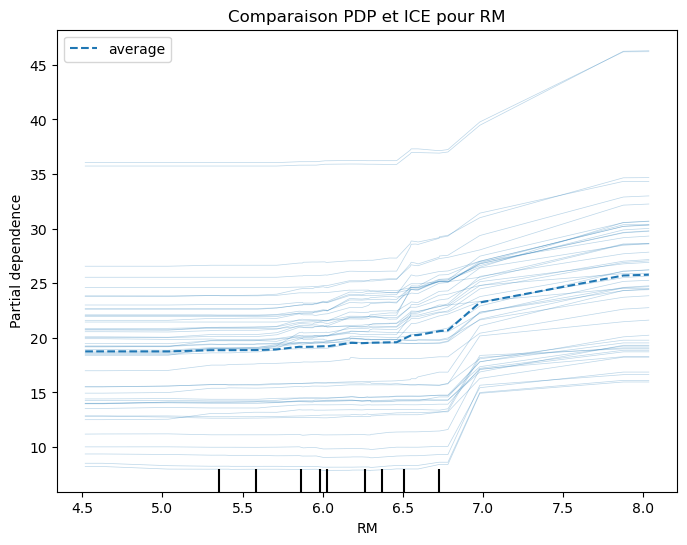

In [22]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# S√©lection d'un √©chantillon al√©atoire de 50 individus pour √©viter trop de courbes
subset = X_test.sample(50, random_state=42)

# ICE pour la variable RM (nombre de pi√®ces)
fig, ax = plt.subplots(figsize=(8,6))
PartialDependenceDisplay.from_estimator(rf_reg, subset, ['RM'], kind='both', ax=ax)
plt.title("Comparaison PDP et ICE pour RM")
plt.show()


In [23]:
import lime
import lime.lime_tabular

# Initialisation de LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X.columns,
                                                   mode='regression')

# Explication pour un individu (ex: premi√®re instance de X_test)
idx = 0  # Modifier pour tester d'autres individus
lime_exp = explainer.explain_instance(X_test.iloc[idx].values, rf_reg.predict)

# Affichage des r√©sultats
lime_exp.show_in_notebook()


C:\Users\lucas\anaconda3\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


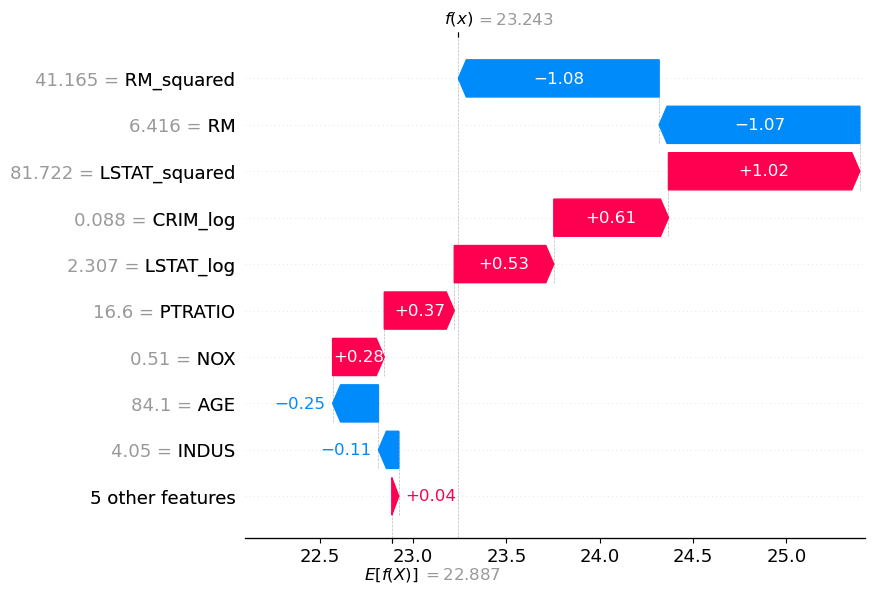

In [27]:
import shap

# Initialisation de l'explainer SHAP pour le mod√®le RF
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

# S√©lection d'un individu pour analyse
idx = 0  # Modifier pour voir d'autres individus
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=shap_values[idx], base_values=explainer.expected_value, data=X_test.iloc[idx]))


In [ ]:
Le PDP donne une vue globale mais simplifie trop la r√©alit√©.
ICE est plus pr√©cis pour voir les variations individuelles.
LIME donne une explication locale mais simplifi√©e.
SHAP est la m√©thode la plus robuste et pr√©cise pour comprendre l'impact de chaque variable sur une pr√©diction sp√©cifique.
SHAP Waterfall est le plus recommand√© pour comprendre une pr√©diction individuelle !

### 8) Explorer les graphiques SHAP √©tudi√©s  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (√©quivalent pdp)

In [42]:
import shap

# Cr√©er un objet shap.Explanation
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test)

# Cr√©er l'objet Explanation si n√©cessaire
shap_explanation = shap.Explanation(values=shap_values, data=X_test, feature_names=X_test.columns)

# Graphique beeswarm
shap.plots.beeswarm(shap_explanation)

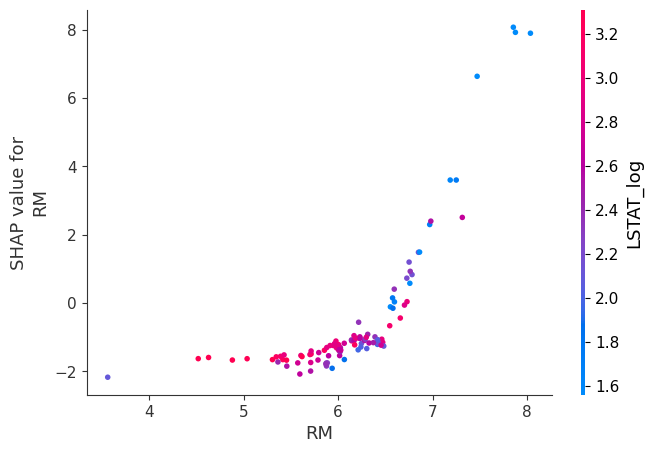

In [43]:
# S√©lection d‚Äôune variable cl√© (ex: RM)
shap.dependence_plot("RM", shap_values, X_test)


In [ ]:
Beeswarm plot nous aide √† comprendre l'importance globale de chaque variable et comment elles influencent globalement les pr√©dictions.
Dependence plot nous aide √† voir la relation localis√©e de chaque variable avec la pr√©diction, tout en tenant compte des interactions entre variables.
Les deux graphiques sont des outils puissants pour explorer et expliquer les pr√©dictions d'un mod√®le, mais chacun met en lumi√®re des aspects diff√©rents de l'explicabilit√© du mod√®le.